In [27]:
import pandas as pd 

In [28]:
data = pd.read_csv("freshset1.csv")

/home/yogi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
data.head()

,Label,Label_type,URL,online,target,verified,SpecialSymbols,LengthofUrl,DigitsInUrl,DotsInUrl
0,1,NaN,https://ghfgkhg.cf/tax/bnc/National%20Bank%20O...,NaN,NaN,NaN,8,56,4,2
1,1,NaN,https://www.personnalite2018.com/perso/indexfi...,NaN,NaN,NaN,5,51,4,3
2,1,NaN,https://www.personnalite2018.com/perso/index2.php,NaN,NaN,NaN,5,49,5,3
3,1,NaN,http://ativascorretora.com.br/chaseonline.chas...,NaN,NaN,NaN,7,95,23,4
4,1,NaN,http://ativascorretora.com.br/chaseonline.chas...,NaN,NaN,NaN,13,262,95,5


In [30]:
data.tail()

,Label,Label_type,URL,online,target,verified,SpecialSymbols,LengthofUrl,DigitsInUrl,DotsInUrl
291934,0,malware,http://kaku588.51sole.com/CompanyContents2.htm,NaN,NaN,NaN,4,46,6,3
291935,0,malware,http://kaku588.51sole.com/CompanyContents1.htm,NaN,NaN,NaN,4,46,6,3
291936,0,malware,http://kaku588.51sole.com/CompanyNews.htm,NaN,NaN,NaN,4,41,5,3
291937,0,malware,http://kaku588.51sole.com/CompanyAbout.htm,NaN,NaN,NaN,4,42,5,3
291938,0,malware,http://kaku588.51sole.com/CompanyProduct.htm,NaN,NaN,NaN,4,44,5,3


In [31]:
pairplot = data.drop(["URL"],axis =1)

In [32]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [33]:
dtc = DecisionTreeClassifier()

In [34]:
X=data.drop(["URL","Label","verified","target","online","Label_type"],axis = 1)

In [35]:
X.head()

,SpecialSymbols,LengthofUrl,DigitsInUrl,DotsInUrl
0,8,56,4,2
1,5,51,4,3
2,5,49,5,3
3,7,95,23,4
4,13,262,95,5


In [36]:
X.describe()

,SpecialSymbols,LengthofUrl,DigitsInUrl,DotsInUrl
count,291939.000000,291939.000000,291939.000000,291939.000000
mean,9.410027,67.507332,9.004590,2.627347
std,9.632508,56.747599,19.192814,1.373571
min,3.000000,11.000000,0.000000,1.000000
25%,5.000000,38.000000,0.000000,2.000000
50%,7.000000,51.000000,3.000000,2.000000
75%,10.000000,76.000000,9.000000,3.000000
max,444.000000,4173.000000,639.000000,36.000000


In [37]:
y = data.Label
y.value_counts()

0    257632
1     34307
Name: Label, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [39]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
predictions=dtc.predict(X_test)

In [41]:
accuracy_score(y_test,predictions)

0.89884907857778995

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
confusion_matrix(y_test,predictions)

array([[75431,  1723],
       [ 7136,  3292]])

In [44]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94     77154
          1       0.66      0.32      0.43     10428

avg / total       0.88      0.90      0.88     87582



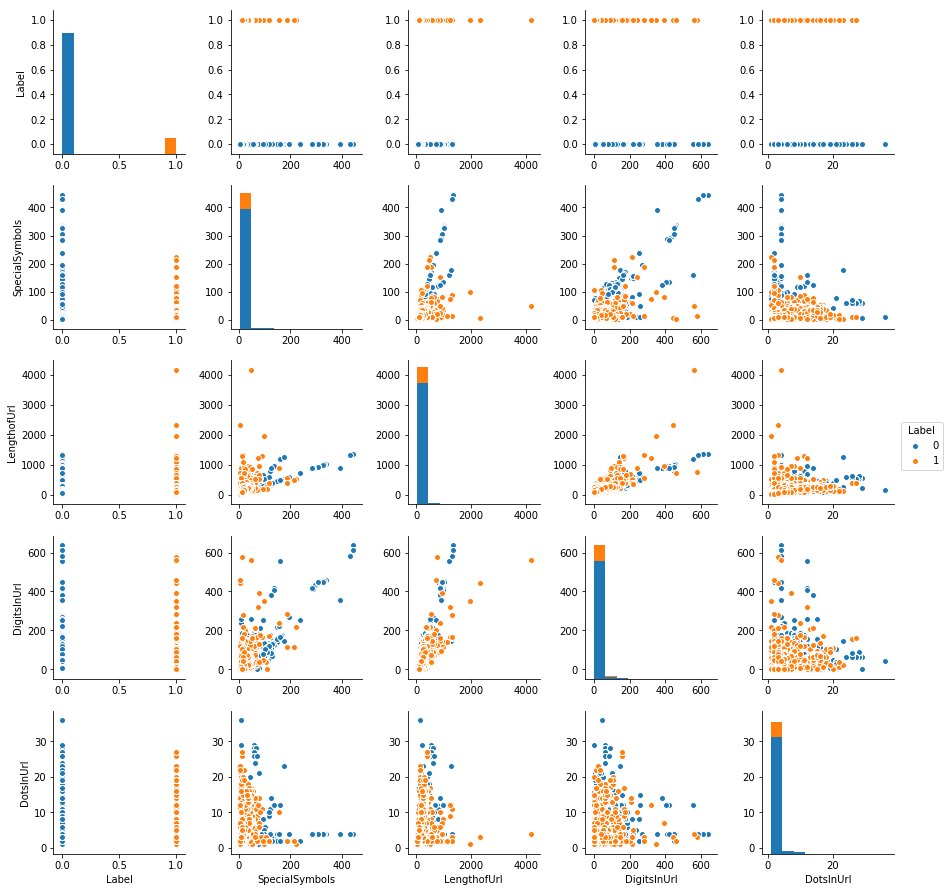

In [26]:
import seaborn as sns
sns.pairplot(pairplot,hue = "Label")